# 1. Dataset Preparation & Analysis

## 1.2 Load the Dataset

In [13]:
#1.2 Load dataset
import gzip
import json

dataset_file = "goemotions.json.gz"
dataset = []
#With the unzipped file, we can now load the json file into the dataset list
with gzip.open(dataset_file,'r') as unzipped:
    dataset = json.load(unzipped)

## 1.3 Extract & Plot

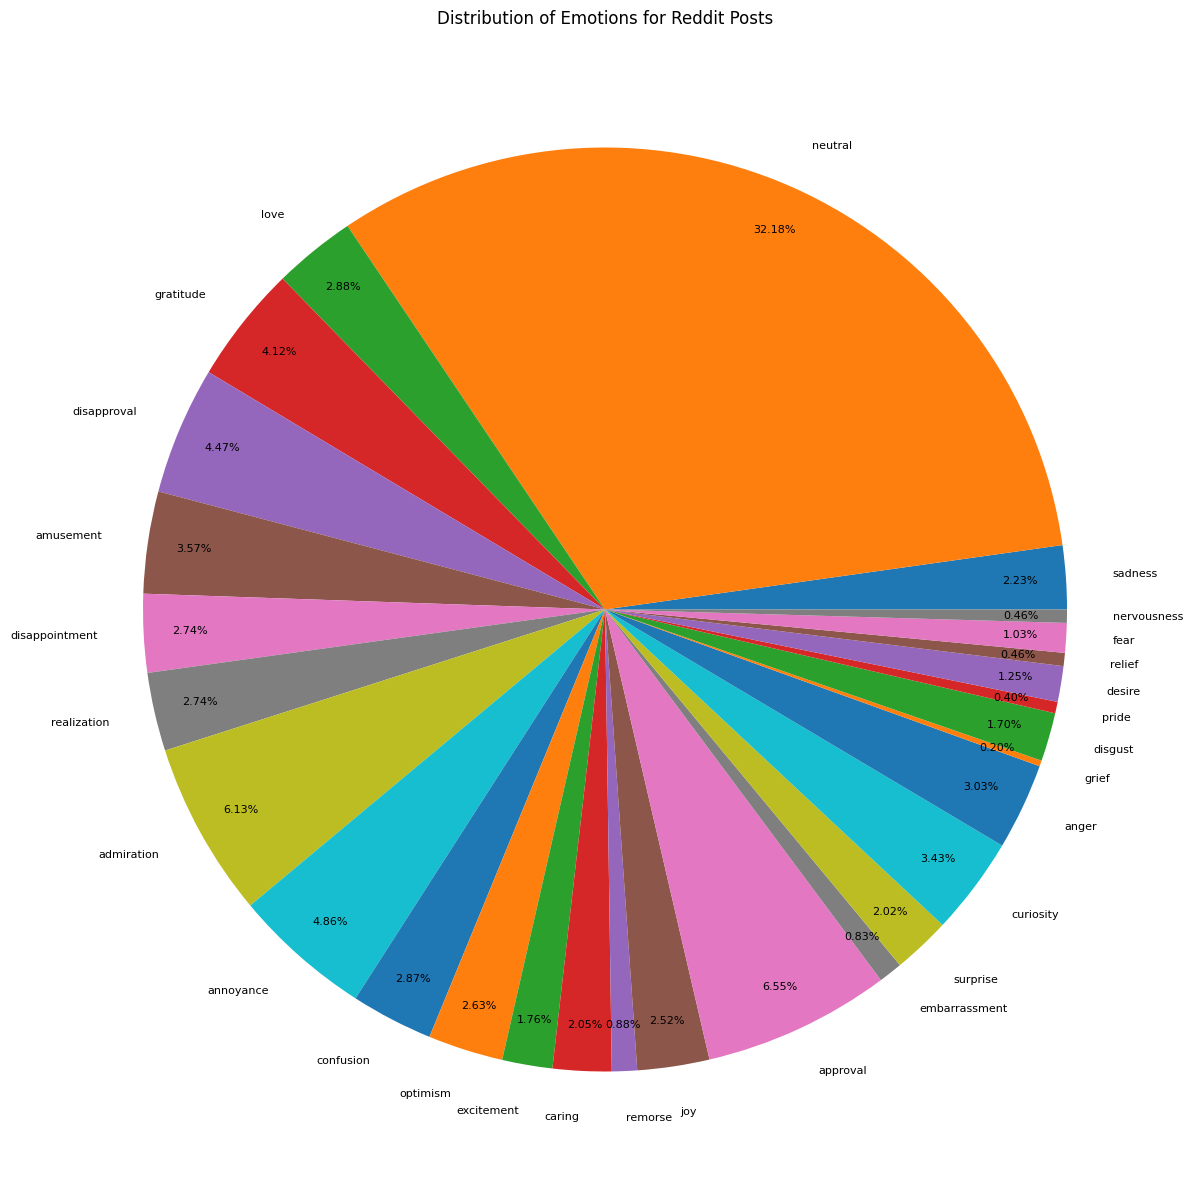

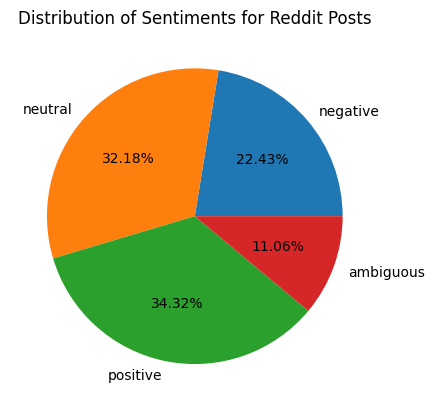

In [14]:
#1.3 Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf
posts = []
emotions = []
sentiments = []
# Setting up lists of posts, emotions and sentiments
for instance in dataset:
    post = instance[0]
    emotion = instance[1]
    sentiment = instance[2]
    
    posts.append(post)
    emotions.append(emotion)
    sentiments.append(sentiment)

#Plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import collections

#Sets up lists of key value pairs for labels and frequency
counter_emotions = collections.Counter(emotions)
counter_sentiments = collections.Counter(sentiments)


#Plot distribution of emotions
plt.figure(figsize=(15,15))
#Autopct is used to display the percentage in the wedges, pctdistance and labeldistance position the labels, textprops is to reduce the fontsize
plt.pie(counter_emotions.values(), labels=counter_emotions.keys(),autopct='%.2f%%', pctdistance=0.9, labeldistance=1.1, textprops={'fontsize': 8}) 
plt.title("Distribution of Emotions for Reddit Posts")
plt.savefig("Emotions_Distribution.pdf")
plt.show()

#Plot distribution of sentiments
plt.pie(counter_sentiments.values(), labels=counter_sentiments.keys(),autopct='%.2f%%')
plt.title("Distribution of Sentiments for Reddit Posts")
plt.savefig("Sentiments_Distribution.pdf")
plt.show()

# Based on the results, we can see that the dataset is imbalanced. Thus:
# 1. Accuracy is not a good option since our class set imbalanced so we will falsely get high accuracy
# 2. Precision and recall are better options due to not being affected by class imbalance.
# 3. Thus, we will use F1 score as our evaluation metric since it is a good metric for imbalanced datasets since it comes from precision and recall.




    

# 2. Words as Features

## 2.1 Process the Dataset

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

vectorizer = CountVectorizer() # Count vectorizer gives a count for each word

# Extract tokens/words from the reddit posts
X = vectorizer.fit_transform(posts) # Gives a sparse matrix, contains mostly zeroes/empty cells
# Get size of vocabulary
print(f"Size of Vocabulary (# of Tokens): {len(vectorizer.get_feature_names_out())}")

# Encoding the labels as was done in Lab 3. This needs to be done as they are string values and we need numerical values for our models
emotions_encoder = preprocessing.LabelEncoder()
y_emotions = emotions_encoder.fit_transform(emotions)

sentiments_encoder = preprocessing.LabelEncoder()
y_sentiments = sentiments_encoder.fit_transform(sentiments)




Size of Vocabulary (# of Tokens): 30449


## 2.2 Split the Dataset

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% is training, 20% is test). Doing this for both labels and the main feature set
# Random state is the seed for the random number generator. Makes it so we can reproduce the same sets each time
X_train, X_test, y_emotions_train, y_emotions_test, y_sentiments_train, y_sentiments_test = train_test_split(X, y_emotions, y_sentiments, test_size=0.2, random_state=2212)


## 2.3

### 2.3.1 Base-MNB

In [17]:
import joblib # To save the models so we don't have to retrain them each time
import os

from sklearn.naive_bayes import MultinomialNB
B_MNB_Emotions = MultinomialNB()
B_MNB_Sentiments = MultinomialNB()

models_folder = os.path.abspath("saved_models")

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/B_MNB_Emotions.pkl"):
    B_MNB_Emotions.fit(X_train, y_emotions_train)
    joblib.dump(B_MNB_Emotions, f"{models_folder}/B_MNB_Emotions.pkl")
else:
    B_MNB_Emotions = joblib.load(f"{models_folder}/B_MNB_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/B_MNB_Sentiments.pkl"):
    B_MNB_Sentiments.fit(X_train, y_sentiments_train)
    joblib.dump(B_MNB_Sentiments, f"{models_folder}/B_MNB_Sentiments.pkl")
else:
    B_MNB_Sentiments = joblib.load(f"{models_folder}/B_MNB_Sentiments.pkl")

# Testing our models on the test sets for each label.
B_MNB_y_emotions_pred = B_MNB_Emotions.predict(X_test)
B_MNB_y_sentiments_pred = B_MNB_Sentiments.predict(X_test)

print("Score for B_MNB_Emotions: ", B_MNB_Emotions.score(X_test, y_emotions_test))
print("Score for B_MNB_Sentiments: ", B_MNB_Sentiments.score(X_test, y_sentiments_test))

Score for B_MNB_Emotions:  0.38685834012338494
Score for B_MNB_Sentiments:  0.5394890001164009


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 2.3.2 Base-DT

In [18]:
from sklearn import tree
B_DT_Emotions = tree.DecisionTreeClassifier()
B_DT_Sentiments = tree.DecisionTreeClassifier()

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/B_DT_Emotions.pkl"):
    B_DT_Emotions.fit(X_train, y_emotions_train)
    joblib.dump(B_DT_Emotions, f"{models_folder}/B_DT_Emotions.pkl")
else:
    B_DT_Emotions = joblib.load(f"{models_folder}/B_DT_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/B_DT_Sentiments.pkl"):
    B_DT_Sentiments.fit(X_train, y_sentiments_train)
    joblib.dump(B_DT_Sentiments, f"{models_folder}/B_DT_Sentiments.pkl")
else:
    B_DT_Sentiments = joblib.load(f"{models_folder}/B_DT_Sentiments.pkl")

# Testing our models on the test sets for each label.
B_DT_y_emotions_pred = B_DT_Emotions.predict(X_test)
B_DT_y_sentiments_pred = B_DT_Sentiments.predict(X_test)

print("Score for B_DT_Emotions: ", B_DT_Emotions.score(X_test, y_emotions_test))
print("Score for B_DT_Sentiments: ", B_DT_Sentiments.score(X_test, y_sentiments_test))

C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for B_DT_Emotions:  0.36087184262600397
Score for B_DT_Sentiments:  0.5441450355022698


### 2.3.3 Base-MLP

In [19]:
from sklearn import neural_network
B_MLP_Emotions = neural_network.MLPClassifier(max_iter=80)
B_MLP_Sentiments = neural_network.MLPClassifier(max_iter=80)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/B_MLP_Emotions.pkl"):
    B_MLP_Emotions.fit(X_train, y_emotions_train)
    joblib.dump(B_MLP_Emotions, f"{models_folder}/B_MLP_Emotions.pkl")
else:
    B_MLP_Emotions = joblib.load(f"{models_folder}/B_MLP_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/B_MLP_Sentiments.pkl"):
    B_MLP_Sentiments.fit(X_train, y_sentiments_train)
    joblib.dump(B_MLP_Sentiments, f"{models_folder}/B_MLP_Sentiments.pkl")
else:
    B_MLP_Sentiments = joblib.load(f"{models_folder}/B_MLP_Sentiments.pkl")

# Testing our models on the test sets for each label.
B_MLP_y_emotions_pred = B_MLP_Emotions.predict(X_test)
B_MLP_y_sentiments_pred = B_MLP_Sentiments.predict(X_test)

print("Score for B_MLP_Emotions: ", B_MLP_Emotions.score(X_test, y_emotions_test))
print("Score for B_MLP_Sentiments: ", B_MLP_Sentiments.score(X_test, y_sentiments_test))

C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for B_MLP_Emotions:  0.3740251425910837
Score for B_MLP_Sentiments:  0.556076126178559


### 2.3.4 Top-MNB

In [20]:
from sklearn.model_selection import GridSearchCV

# hyperparameter alpha for the grid search.
# Deals with smoothing. The value 0 is technically not allowed since it's too small, so it's adjusted to 1e-10.
hp_alpha = {
    'alpha': [0.5, 0, 0.48, 0.21],
}
estimator_emotions_MNB = MultinomialNB()
estimator_sentiments_MNB = MultinomialNB()

# Due to the results in 1.3 we will use f1_weighted as the scoring metric since the classes are not balanced.
# Weighted average being used to better represent the massive descrepancy in class representation.
scorer = 'f1_weighted' # Using this scorer to compare only makes sense for these gridsearch models, we don't need it for the base models

T_MNB_Emotions = GridSearchCV(estimator=estimator_emotions_MNB,
                              param_grid=hp_alpha, scoring=scorer)
T_MNB_Sentiments = GridSearchCV(estimator=estimator_sentiments_MNB,
                              param_grid=hp_alpha, scoring=scorer)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/T_MNB_Emotions.pkl"):
    T_MNB_Emotions.fit(X_train, y_emotions_train)
    joblib.dump(T_MNB_Emotions, f"{models_folder}/T_MNB_Emotions.pkl")
else:
    T_MNB_Emotions = joblib.load(f"{models_folder}/T_MNB_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/T_MNB_Sentiments.pkl"):
    T_MNB_Sentiments.fit(X_train, y_sentiments_train)
    joblib.dump(T_MNB_Sentiments, f"{models_folder}/T_MNB_Sentiments.pkl")
else:
    T_MNB_Sentiments = joblib.load(f"{models_folder}/T_MNB_Sentiments.pkl")

# Testing our models on the test sets for each label.
print(f"Best estimator for T_MNB_Emotions: {T_MNB_Emotions.best_estimator_} with a f1_weighted score of {T_MNB_Emotions.best_score_}")
print(f"Best estimator for T_MNB_Sentiments: {T_MNB_Sentiments.best_estimator_} with a f1_weighted score of {T_MNB_Sentiments.best_score_}")
T_MNB_y_emotions_pred = T_MNB_Emotions.predict(X_test)
T_MNB_y_sentiments_pred = T_MNB_Sentiments.predict(X_test)


Best estimator for T_MNB_Emotions: MultinomialNB(alpha=0.21) with a f1_weighted score of 0.3541375439753037
Best estimator for T_MNB_Sentiments: MultinomialNB(alpha=0.48) with a f1_weighted score of 0.534980348403334


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 2.3.5 Top-DT

In [21]:
estimator_emotions_DT = tree.DecisionTreeClassifier()
estimator_sentiments_DT = tree.DecisionTreeClassifier()

# hyperparameters used for the grid search.
# criterion, max_depth and min_samples_split are what we will be experimenting with.
hp_dt = {
    'criterion': ['gini', 'entropy'], #criterion: Evaluates splits in the tree.
    'max_depth': [4, 10], # max_depth: Maximum depth of the tree.
    'min_samples_split': [8, 10, 12] #min_samples_split: Minimum number of samples required to split an internal node.
}

T_DT_Emotions = GridSearchCV(estimator=estimator_emotions_DT,
                                param_grid=hp_dt, scoring=scorer)
T_DT_Sentiments = GridSearchCV(estimator=estimator_sentiments_DT,
                                param_grid=hp_dt, scoring=scorer)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/T_DT_Emotions.pkl"):
    T_DT_Emotions.fit(X_train, y_emotions_train)
    joblib.dump(T_DT_Emotions, f"{models_folder}/T_DT_Emotions.pkl")
else:
    T_DT_Emotions = joblib.load(f"{models_folder}/T_DT_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/T_DT_Sentiments.pkl"):
    T_DT_Sentiments.fit(X_train, y_sentiments_train)
    joblib.dump(T_DT_Sentiments, f"{models_folder}/T_DT_Sentiments.pkl")
else:
    T_DT_Sentiments = joblib.load(f"{models_folder}/T_DT_Sentiments.pkl")

# Testing our models on the test sets for each label.
print(f"Best estimator for T_DT_Emotions: {T_DT_Emotions.best_estimator_} with a f1_weighted score of {T_DT_Emotions.best_score_}")
print(f"Best estimator for T_DT_Sentiments: {T_DT_Sentiments.best_estimator_} with a f1_weighted score of {T_DT_Sentiments.best_score_}")
T_DT_y_emotions_pred = T_DT_Emotions.predict(X_test)
T_DT_y_sentiments_pred = T_DT_Sentiments.predict(X_test)

Best estimator for T_DT_Emotions: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8) with a f1_weighted score of 0.2691085062004442
Best estimator for T_DT_Sentiments: DecisionTreeClassifier(max_depth=10, min_samples_split=12) with a f1_weighted score of 0.349041899591046


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 2.3.6 Top-MLP

In [22]:
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
estimator_emotions_MLP = neural_network.MLPClassifier(max_iter=80)
estimator_sentiments_MLP = neural_network.MLPClassifier(max_iter=80)

# hyperparameters used for the grid search.
# criterion, max_depth and min_samples_split are what we will be experimenting with.
hp_mlp = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'], #activation: sigmoid = logistic.
    'hidden_layer_sizes': [[30,50], [10,10,10]], # max_depth: Maximum depth of the tree.
    'solver': ['adam', 'sgd'] #Adam and stochastic gradient descent
}

T_MLP_Emotions = GridSearchCV(estimator=estimator_emotions_MLP,
                                param_grid=hp_mlp, scoring=scorer, n_jobs=-1) # n_jobs=-1 means that we will use all cpu cores
T_MLP_Sentiments = GridSearchCV(estimator=estimator_sentiments_MLP,
                                param_grid=hp_mlp, scoring=scorer, n_jobs=-1)# n_jobs=-1 means that we will use all cpu cores

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/T_MLP_Emotions.pkl"):
    T_MLP_Emotions.fit(X_train, y_emotions_train)
    joblib.dump(T_MLP_Emotions, f"{models_folder}/T_MLP_Emotions.pkl")
else:
    T_MLP_Emotions = joblib.load(f"{models_folder}/T_MLP_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/T_MLP_Sentiments.pkl"):
    T_MLP_Sentiments.fit(X_train, y_sentiments_train)
    joblib.dump(T_MLP_Sentiments, f"{models_folder}/T_MLP_Sentiments.pkl")
else:
    T_MLP_Sentiments = joblib.load(f"{models_folder}/T_MLP_Sentiments.pkl")

print(f"Best estimator for T_MLP_Emotions: {T_MLP_Emotions.best_estimator_} with a f1_weighted score of {T_MLP_Emotions.best_score_}")
print(f"Best estimator for T_MLP_Sentiments: {T_MLP_Sentiments.best_estimator_} with a f1_weighted score of {T_MLP_Sentiments.best_score_}")
# Testing our models on the test sets for each label.
T_MLP_y_emotions_pred = T_MLP_Emotions.predict(X_test)
T_MLP_y_sentiments_pred = T_MLP_Sentiments.predict(X_test)


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Best estimator for T_MLP_Emotions: MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 50], max_iter=80,
              solver='sgd') with a f1_weighted score of 0.3690429025714061
Best estimator for T_MLP_Sentiments: MLPClassifier(hidden_layer_sizes=[30, 50], max_iter=80, solver='sgd') with a f1_weighted score of 0.55577711880727


## 2.4

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

file_name = "performance.txt"

# Getting the classification report for each label for emotions. target_names sets the names based on the emotions_encoder
B_MNB_classification_report_emotions = classification_report(y_emotions_test, B_MNB_y_emotions_pred, target_names=emotions_encoder.classes_)
B_DT_classification_report_emotions = classification_report(y_emotions_test, B_DT_y_emotions_pred, target_names=emotions_encoder.classes_)
B_MLP_classification_report_emotions = classification_report(y_emotions_test, B_MLP_y_emotions_pred, target_names=emotions_encoder.classes_)
T_MNB_classification_report_emotions = classification_report(y_emotions_test, T_MNB_y_emotions_pred, target_names=emotions_encoder.classes_)
T_DT_classification_report_emotions = classification_report(y_emotions_test, T_DT_y_emotions_pred, target_names=emotions_encoder.classes_)
T_MLP_classification_report_emotions = classification_report(y_emotions_test, T_MLP_y_emotions_pred, target_names=emotions_encoder.classes_)


# Getting the classification report for each label for sentiments. target_names sets the names based on the sentiments_encoder
B_MNB_classification_report_sentiments = classification_report(y_sentiments_test, B_MNB_y_sentiments_pred, target_names=sentiments_encoder.classes_)
B_DT_classification_report_sentiments = classification_report(y_sentiments_test, B_DT_y_sentiments_pred, target_names=sentiments_encoder.classes_)
B_MLP_classification_report_sentiments = classification_report(y_sentiments_test, B_MLP_y_sentiments_pred, target_names=sentiments_encoder.classes_)
T_MNB_classification_report_sentiments = classification_report(y_sentiments_test, T_MNB_y_sentiments_pred, target_names=sentiments_encoder.classes_)
T_DT_classification_report_sentiments = classification_report(y_sentiments_test, T_DT_y_sentiments_pred, target_names=sentiments_encoder.classes_)
T_MLP_classification_report_sentiments = classification_report(y_sentiments_test, T_MLP_y_sentiments_pred, target_names=sentiments_encoder.classes_)

# Getting the confusion matrix for each label for emotions
B_MNB_confusion_matrix_emotions = confusion_matrix(y_emotions_test, B_MNB_y_emotions_pred)
B_DT_confusion_matrix_emotions = confusion_matrix(y_emotions_test, B_DT_y_emotions_pred)
B_MLP_confusion_matrix_emotions = confusion_matrix(y_emotions_test, B_MLP_y_emotions_pred)
T_MNB_confusion_matrix_emotions = confusion_matrix(y_emotions_test, T_MNB_y_emotions_pred)
T_DT_confusion_matrix_emotions = confusion_matrix(y_emotions_test, T_DT_y_emotions_pred)
T_MLP_confusion_matrix_emotions = confusion_matrix(y_emotions_test, T_MLP_y_emotions_pred)

# Getting the confusion matrix for each label for sentiments
B_MNB_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test, B_MNB_y_sentiments_pred)
B_DT_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test, B_DT_y_sentiments_pred)
B_MLP_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test, B_MLP_y_sentiments_pred)
T_MNB_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test, T_MNB_y_sentiments_pred)
T_DT_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test, T_DT_y_sentiments_pred)
T_MLP_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test, T_MLP_y_sentiments_pred)

# Writing the classification report and confusion matrix to a file for all of the classifiers
np.set_printoptions(linewidth=np.inf) # So the confusion matrix doesn't wrap in the text file
with open(file_name, 'w') as file:

    file.write("~~~~~~MODEL: Base-MNB: HYPERPARAMETERS: None~~~~~~\n")
    file.write("~~Base-MNB Classification report for Emotions~~\n")
    file.write(B_MNB_classification_report_emotions)
    file.write("\n~~Base-MNB Classification report for Sentiments~~\n")
    file.write(B_MNB_classification_report_sentiments)
    file.write("\n~~Base-MNB Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(B_MNB_confusion_matrix_emotions)))
    file.write("\n~~Base-MNB Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(B_MNB_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")
    
    file.write("\n~~~~~~MODEL: Base-DT: HYPERPARAMETERS: None~~~~~~\n")
    file.write("~~Base-DT Classification report for Emotions~~\n")
    file.write(B_DT_classification_report_emotions)
    file.write("\n~~Base-DT Classification report for Sentiments~~\n")
    file.write(B_DT_classification_report_sentiments)
    file.write("\n~~Base-DT Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(B_DT_confusion_matrix_emotions)))
    file.write("\n~~Base-DT Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(B_DT_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write("\n~~~~~~MODEL: Base-MLP: HYPERPARAMETERS: None~~~~~~\n")
    file.write("~~Base-MLP Classification report for Emotions~~\n")
    file.write(B_MLP_classification_report_emotions)
    file.write("\n~~Base-MLP Classification report for Sentiments~~\n")
    file.write(B_MLP_classification_report_sentiments)
    file.write("\n~~Base-MLP Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(B_MLP_confusion_matrix_emotions)))
    file.write("\n~~Base-MLP Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(B_MLP_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write(f"\n~~~~~~MODEL: T-MNB: HYPERPARAMETERS: As chosen by GridSearchCV\n\tEmotions: {T_MNB_Emotions.best_estimator_} \n\tSentiments: {T_MNB_Sentiments.best_estimator_}~~~~~~\n")
    file.write("~~T-MNB Classification report for Emotions~~\n")
    file.write(T_MNB_classification_report_emotions)
    file.write("\n~~T-MNB Classification report for Sentiments~~\n")
    file.write(T_MNB_classification_report_sentiments)
    file.write("\n~~T-MNB Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(T_MNB_confusion_matrix_emotions)))
    file.write("\n~~T-MNB Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(T_MNB_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write("\n~~~~~~MODEL: T-DT ~~~~~~\n")
    file.write(f"~~~~HYPERPARAMETERS: As chosen by GridSearchCV: \n\tEmotions: {T_DT_Emotions.best_estimator_} \n\tSentiments:{T_DT_Sentiments.best_estimator_}~~~~~~\n")
    file.write("~~T-DT Classification report for Emotions~~\n")
    file.write(T_DT_classification_report_emotions)
    file.write("\n~~T-DT Classification report for Sentiments~~\n")
    file.write(T_DT_classification_report_sentiments)
    file.write("\n~~T-DT Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(T_DT_confusion_matrix_emotions)))
    file.write("\n~~T-DT Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(T_DT_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")
  
    file.write("\n~~~~~~MODEL: T-MLP ~~~~~~\n")
    file.write(f"~~~~HYPERPARAMETERS: As chosen by GridSearchCV: \n\tEmotions: {T_MLP_Emotions.best_estimator_}\n\tSentiments: {T_MLP_Sentiments.best_estimator_}~~~~~~\n") # TODO
    file.write("~~T-MLP Classification report for Emotions~~\n")
    file.write(T_MLP_classification_report_emotions)
    file.write("\n~~T-MLP Classification report for Sentiments~~\n")
    file.write(T_MLP_classification_report_sentiments)
    file.write("\n~~T-MLP Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(T_MLP_confusion_matrix_emotions)))
    file.write("\n~~T-MLP Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(T_MLP_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    
    file.close()


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## 2.5 - Using TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

vectorizer_tfid = TfidfTransformer() # Count vectorizer gives a count for each word

# Extract tokens/words from the reddit posts using tfid now
X_tfid = vectorizer_tfid.fit_transform(X) # Gives a sparse matrix, contains mostly zeroes/empty cells

# Get preview of idf values
df_idf = pd.DataFrame(vectorizer_tfid.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
print(df_idf.sort_values(by=['idf_weights']))

# Splitting the dataset into training and testing sets (80% is training, 20% is test). Doing this for both labels and the main feature set
# Random state is the seed for the random number generator. Makes it so we can reproduce the same sets each time
X_train_tfid, X_test_tfid, y_emotions_train_tfid, y_emotions_test_tfid, y_sentiments_train_tfid, y_sentiments_test_tfid = train_test_split(X_tfid, y_emotions, y_sentiments, test_size=0.2, random_state=2212)


            idf_weights
the            2.130323
to             2.403915
it             2.581749
you            2.610142
that           2.619975
...                 ...
becoz         12.361061
beeen         12.361061
disbelieve    12.361061
otto          12.361061
doesny        12.361061

[30449 rows x 1 columns]


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 2.5.1 Base-MNB w/TF-IDF

In [25]:
B_MNB_IDF_Emotions = MultinomialNB()
B_MNB_IDF_Sentiments = MultinomialNB()

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/B_MNB_IDF_Emotions.pkl"):
    B_MNB_IDF_Emotions.fit(X_train_tfid, y_emotions_train_tfid)
    joblib.dump(B_MNB_IDF_Emotions, f"{models_folder}/B_MNB_IDF_Emotions.pkl")
else:
    B_MNB_IDF_Emotions = joblib.load(f"{models_folder}/B_MNB_IDF_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/B_MNB_IDF_Sentiments.pkl"):
    B_MNB_IDF_Sentiments.fit(X_train_tfid, y_sentiments_train_tfid)
    joblib.dump(B_MNB_IDF_Sentiments, f"{models_folder}/B_MNB_IDF_Sentiments.pkl")
else:
    B_MNB_IDF_Sentiments = joblib.load(f"{models_folder}/B_MNB_IDF_Sentiments.pkl")

# Testing our models on the test sets for each label.
B_MNB_IDF_y_emotions_pred = B_MNB_IDF_Emotions.predict(X_test_tfid)
B_MNB_IDF_y_sentiments_pred = B_MNB_IDF_Sentiments.predict(X_test_tfid)

print("Score for B_MNB_IDF_Emotions: ", B_MNB_IDF_Emotions.score(X_test_tfid, y_emotions_test_tfid))
print("Score for B_MNB_IDF_Sentiments: ", B_MNB_IDF_Sentiments.score(X_test_tfid, y_sentiments_test_tfid))

Score for B_MNB_IDF_Emotions:  0.3430334070538936
Score for B_MNB_IDF_Sentiments:  0.52060295658247


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 2.5.2 Base-DT w/TF-IDF


In [26]:
B_DT_IDF_Emotions = tree.DecisionTreeClassifier()
B_DT_IDF_Sentiments = tree.DecisionTreeClassifier()

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/B_DT_IDF_Emotions.pkl"):
    B_DT_IDF_Emotions.fit(X_train_tfid, y_emotions_train_tfid)
    joblib.dump(B_DT_IDF_Emotions, f"{models_folder}/B_DT_IDF_Emotions.pkl")
else:
    B_DT_IDF_Emotions = joblib.load(f"{models_folder}/B_DT_IDF_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/B_DT_IDF_Sentiments.pkl"):
    B_DT_IDF_Sentiments.fit(X_train_tfid, y_sentiments_train_tfid)
    joblib.dump(B_DT_IDF_Sentiments, f"{models_folder}/B_DT_IDF_Sentiments.pkl")
else:
    B_DT_IDF_Sentiments = joblib.load(f"{models_folder}/B_DT_IDF_Sentiments.pkl")

# Testing our models on the test sets for each label.
B_DT_IDF_y_emotions_pred = B_DT_IDF_Emotions.predict(X_test_tfid)
B_DT_IDF_y_sentiments_pred = B_DT_IDF_Sentiments.predict(X_test_tfid)

print("Score for B_DT_IDF_Emotions: ", B_DT_IDF_Emotions.score(X_test_tfid, y_emotions_test_tfid))
print("Score for B_DT_IDF_Sentiments: ", B_DT_IDF_Sentiments.score(X_test_tfid, y_sentiments_test_tfid))

C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for B_DT_IDF_Emotions:  0.3599988359911535
Score for B_DT_IDF_Sentiments:  0.5431556279827726


### 2.5.3 Base-MLP w/TF-IDF

In [27]:
B_MLP_IDF_Emotions = neural_network.MLPClassifier(max_iter=80)
B_MLP_IDF_Sentiments = neural_network.MLPClassifier(max_iter=80)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/B_MLP_IDF_Emotions.pkl"):
    B_MLP_IDF_Emotions.fit(X_train_tfid, y_emotions_train_tfid)
    joblib.dump(B_MLP_IDF_Emotions, f"{models_folder}/B_MLP_IDF_Emotions.pkl")
else:
    B_MLP_IDF_Emotions = joblib.load(f"{models_folder}/B_MLP_IDF_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/B_MLP_IDF_Sentiments.pkl"):
    B_MLP_IDF_Sentiments.fit(X_train_tfid, y_sentiments_train_tfid)
    joblib.dump(B_MLP_IDF_Sentiments, f"{models_folder}/B_MLP_IDF_Sentiments.pkl")
else:
    B_MLP_IDF_Sentiments = joblib.load(f"{models_folder}/B_MLP_IDF_Sentiments.pkl")

# Testing our models on the test sets for each label.
B_MLP_IDF_y_emotions_pred = B_MLP_IDF_Emotions.predict(X_test_tfid)
B_MLP_IDF_y_sentiments_pred = B_MLP_IDF_Sentiments.predict(X_test_tfid)

print("Score for B_MLP_IDF_Emotions: ", B_MLP_IDF_Emotions.score(X_test_tfid, y_emotions_test_tfid))
print("Score for B_MLP_IDF_Sentiments: ", B_MLP_IDF_Sentiments.score(X_test_tfid, y_sentiments_test_tfid))

C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for B_MLP_IDF_Emotions:  0.3858980328250495
Score for B_MLP_IDF_Sentiments:  0.5534571062740077


### 2.5.4 Top-MNB w/TF-IDF


In [28]:
# hyperparameter alpha for the grid search.
# Deals with smoothing. The value 0 is technically not allowed since it's too small, so it's adjusted to 1e-10.

estimator_emotions_MNB_tfid = MultinomialNB()
estimator_sentiments_MNB_tfid = MultinomialNB()

# Due to the results in 1.3 we will use f1_weighted as the scoring metric since the classes are not balanced.
# Weighted average being used to better represent the massive descrepancy in class representation.
scorer = 'f1_weighted' # Using this scorer to compare only makes sense for these gridsearch models, we don't need it for the base models

T_MNB_IDF_Emotions = GridSearchCV(estimator=estimator_emotions_MNB_tfid,
                              param_grid=hp_alpha, scoring=scorer,n_jobs=-1)
T_MNB_IDF_Sentiments = GridSearchCV(estimator=estimator_sentiments_MNB_tfid,
                              param_grid=hp_alpha, scoring=scorer,n_jobs=-1)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/T_MNB_IDF_Emotions.pkl"):
    T_MNB_IDF_Emotions.fit(X_train_tfid, y_emotions_train_tfid)
    joblib.dump(T_MNB_IDF_Emotions, f"{models_folder}/T_MNB_IDF_Emotions.pkl")
else:
    T_MNB_IDF_Emotions = joblib.load(f"{models_folder}/T_MNB_IDF_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/T_MNB_IDF_Sentiments.pkl"):
    T_MNB_IDF_Sentiments.fit(X_train_tfid, y_sentiments_train_tfid)
    joblib.dump(T_MNB_IDF_Sentiments, f"{models_folder}/T_MNB_IDF_Sentiments.pkl")
else:
    T_MNB_IDF_Sentiments = joblib.load(f"{models_folder}/T_MNB_IDF_Sentiments.pkl")

# Testing our models on the test sets for each label.
print(f"Best estimator for T_MNB_IDF_Emotions: {T_MNB_IDF_Emotions.best_estimator_} with a f1_weighted score of {T_MNB_IDF_Emotions.best_score_}")
print(f"Best estimator for T_MNB_IDF_Sentiments: {T_MNB_IDF_Sentiments.best_estimator_} with a f1_weighted score of {T_MNB_IDF_Sentiments.best_score_}")
T_MNB_IDF_y_emotions_pred = T_MNB_IDF_Emotions.predict(X_test_tfid)
T_MNB_IDF_y_sentiments_pred = T_MNB_IDF_Sentiments.predict(X_test_tfid)

Best estimator for T_MNB_IDF_Emotions: MultinomialNB(alpha=0) with a f1_weighted score of 0.31664066424399107
Best estimator for T_MNB_IDF_Sentiments: MultinomialNB(alpha=0) with a f1_weighted score of 0.5130368892839872


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 2.5.5 Top-DT w/TF-IDF


In [29]:
estimator_emotions_DT = tree.DecisionTreeClassifier()
estimator_sentiments_DT = tree.DecisionTreeClassifier()

T_DT_IDF_Emotions = GridSearchCV(estimator=estimator_emotions_DT,
                                param_grid=hp_dt, scoring=scorer, n_jobs=-1)
T_DT_IDF_Sentiments = GridSearchCV(estimator=estimator_sentiments_DT,
                                param_grid=hp_dt, scoring=scorer, n_jobs=-1)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/T_DT_IDF_Emotions.pkl"):
    T_DT_IDF_Emotions.fit(X_train_tfid, y_emotions_train_tfid)
    joblib.dump(T_DT_IDF_Emotions, f"{models_folder}/T_DT_IDF_Emotions.pkl")
else:
    T_DT_IDF_Emotions = joblib.load(f"{models_folder}/T_DT_IDF_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/T_DT_IDF_Sentiments.pkl"):
    T_DT_IDF_Sentiments.fit(X_train_tfid, y_sentiments_train_tfid)
    joblib.dump(T_DT_IDF_Sentiments, f"{models_folder}/T_DT_IDF_Sentiments.pkl")
else:
    T_DT_IDF_Sentiments = joblib.load(f"{models_folder}/T_DT_IDF_Sentiments.pkl")

# Testing our models on the test sets for each label.
print(f"Best estimator for T_DT_IDF_Emotions: {T_DT_IDF_Emotions.best_estimator_} with a f1_weighted score of {T_DT_IDF_Emotions.best_score_}")
print(f"Best estimator for T_DT_IDF_Sentiments: {T_DT_IDF_Sentiments.best_estimator_} with a f1_weighted score of {T_DT_IDF_Sentiments.best_score_}")
T_DT_IDF_y_emotions_pred = T_DT_IDF_Emotions.predict(X_test_tfid)
T_DT_IDF_y_sentiments_pred = T_DT_IDF_Sentiments.predict(X_test_tfid)

Best estimator for T_DT_IDF_Emotions: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8) with a f1_weighted score of 0.2668607481645597
Best estimator for T_DT_IDF_Sentiments: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8) with a f1_weighted score of 0.3501754074684226


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### 2.5.6 Top-MLP w/TF-IDF

In [30]:
estimator_emotions_MLP_tfid = neural_network.MLPClassifier(max_iter=80)
estimator_sentiments_MLP_tfid = neural_network.MLPClassifier(max_iter=80)

# hyperparameters used for the grid search.
# criterion, max_depth and min_samples_split are what we will be experimenting with.
T_MLP_IDF_Emotions = GridSearchCV(estimator=estimator_emotions_MLP_tfid,
                                param_grid=hp_mlp, scoring=scorer,n_jobs=-1)
T_MLP_IDF_Sentiments = GridSearchCV(estimator=estimator_sentiments_MLP_tfid,
                                param_grid=hp_mlp, scoring=scorer,n_jobs=-1)

# Training the models (if we didn't already train them). If we already trained them, we can just load them from the pkl file!
if not os.path.isfile(f"{models_folder}/T_MLP_IDF_Emotions.pkl"):
    T_MLP_IDF_Emotions.fit(X_train_tfid, y_emotions_train_tfid)
    joblib.dump(T_MLP_IDF_Emotions, f"{models_folder}/T_MLP_IDF_Emotions.pkl")
else:
    T_MLP_IDF_Emotions = joblib.load(f"{models_folder}/T_MLP_IDF_Emotions.pkl")

if not os.path.isfile(f"{models_folder}/T_MLP_IDF_Sentiments.pkl"):
    T_MLP_IDF_Sentiments.fit(X_train_tfid, y_sentiments_train_tfid)
    joblib.dump(T_MLP_IDF_Sentiments, f"{models_folder}/T_MLP_IDF_Sentiments.pkl")
else:
    T_MLP_IDF_Sentiments = joblib.load(f"{models_folder}/T_MLP_IDF_Sentiments.pkl")

# Testing our models on the test sets for each label.
print(f"Best estimator for T_MLP_IDF_Emotions: {T_MLP_IDF_Emotions.best_estimator_} with a f1_weighted score of {T_MLP_IDF_Emotions.best_score_}")
print(f"Best estimator for T_MLP_IDF_Sentiments: {T_MLP_IDF_Sentiments.best_estimator_} with a f1_weighted score of {T_MLP_IDF_Sentiments.best_score_}")
T_MLP_IDF_y_emotions_pred = T_MLP_IDF_Emotions.predict(X_test_tfid)
T_MLP_IDF_y_sentiments_pred = T_MLP_IDF_Sentiments.predict(X_test_tfid)


C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Best estimator for T_MLP_IDF_Emotions: MLPClassifier(activation='logistic', hidden_layer_sizes=[30, 50], max_iter=80) with a f1_weighted score of 0.36558961547172336
Best estimator for T_MLP_IDF_Sentiments: MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 50], max_iter=80,
              solver='sgd') with a f1_weighted score of 0.5529784650712363


### 2.5.7 running Confusion matrix like 2.4

In [31]:
file_name_tfid = "performance_IDF.txt"

# Getting the classification report for each label for emotions. target_names sets the names based on the emotions_encoder
B_MNB_IDF_classification_report_emotions = classification_report(y_emotions_test_tfid, B_MNB_IDF_y_emotions_pred, target_names=emotions_encoder.classes_)
B_DT_IDF_classification_report_emotions = classification_report(y_emotions_test_tfid, B_DT_IDF_y_emotions_pred, target_names=emotions_encoder.classes_)
B_MLP_IDF_classification_report_emotions = classification_report(y_emotions_test_tfid, B_MLP_IDF_y_emotions_pred, target_names=emotions_encoder.classes_)
T_MNB_IDF_classification_report_emotions = classification_report(y_emotions_test_tfid, T_MNB_IDF_y_emotions_pred, target_names=emotions_encoder.classes_)
T_DT_IDF_classification_report_emotions = classification_report(y_emotions_test_tfid, T_DT_IDF_y_emotions_pred, target_names=emotions_encoder.classes_)
T_MLP_IDF_classification_report_emotions = classification_report(y_emotions_test_tfid, T_MLP_IDF_y_emotions_pred, target_names=emotions_encoder.classes_)


# Getting the classification report for each label for sentiments. target_names sets the names based on the sentiments_encoder
B_MNB_IDF_classification_report_sentiments = classification_report(y_sentiments_test_tfid, B_MNB_IDF_y_sentiments_pred, target_names=sentiments_encoder.classes_)
B_DT_IDF_classification_report_sentiments = classification_report(y_sentiments_test_tfid, B_DT_IDF_y_sentiments_pred, target_names=sentiments_encoder.classes_)
B_MLP_IDF_classification_report_sentiments = classification_report(y_sentiments_test_tfid, B_MLP_IDF_y_sentiments_pred, target_names=sentiments_encoder.classes_)
T_MNB_IDF_classification_report_sentiments = classification_report(y_sentiments_test_tfid, T_MNB_IDF_y_sentiments_pred, target_names=sentiments_encoder.classes_)
T_DT_IDF_classification_report_sentiments = classification_report(y_sentiments_test_tfid, T_DT_IDF_y_sentiments_pred, target_names=sentiments_encoder.classes_)
T_MLP_IDF_classification_report_sentiments = classification_report(y_sentiments_test_tfid, T_MLP_IDF_y_sentiments_pred, target_names=sentiments_encoder.classes_)

# Getting the confusion matrix for each label for emotions
B_MNB_IDF_confusion_matrix_emotions = confusion_matrix(y_emotions_test_tfid, B_MNB_IDF_y_emotions_pred)
B_DT_IDF_confusion_matrix_emotions = confusion_matrix(y_emotions_test_tfid, B_DT_IDF_y_emotions_pred)
B_MLP_IDF_confusion_matrix_emotions = confusion_matrix(y_emotions_test_tfid, B_MLP_IDF_y_emotions_pred)
T_MNB_IDF_confusion_matrix_emotions = confusion_matrix(y_emotions_test_tfid, T_MNB_IDF_y_emotions_pred)
T_DT_IDF_confusion_matrix_emotions = confusion_matrix(y_emotions_test_tfid, T_DT_IDF_y_emotions_pred)
T_MLP_IDF_confusion_matrix_emotions = confusion_matrix(y_emotions_test_tfid, T_MLP_IDF_y_emotions_pred)

# Getting the confusion matrix for each label for sentiments
B_MNB_IDF_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test_tfid, B_MNB_IDF_y_sentiments_pred)
B_DT_IDF_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test_tfid, B_DT_IDF_y_sentiments_pred)
B_MLP_IDF_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test_tfid, B_MLP_IDF_y_sentiments_pred)
T_MNB_IDF_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test_tfid, T_MNB_IDF_y_sentiments_pred)
T_DT_IDF_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test_tfid, T_DT_IDF_y_sentiments_pred)
T_MLP_IDF_confusion_matrix_sentiments = confusion_matrix(y_sentiments_test_tfid, T_MLP_IDF_y_sentiments_pred)

# Writing the classification report and confusion matrix to a file for all of the classifiers
np.set_printoptions(linewidth=np.inf) # So the confusion matrix doesn't wrap in the text file
with open(file_name_tfid, 'w') as file:

    file.write("~~~~~~Tests Below Generated Using TF-IDF~~~~~\n")

    file.write("-----------------------------------------------------\n")

    file.write("~~~~~~MODEL: Base-MNB: HYPERPARAMETERS: None~~~~~~\n")
    file.write("~~Base-MNB Classification report for Emotions~~\n")
    file.write(B_MNB_IDF_classification_report_emotions)
    file.write("\n~~Base-MNB Classification report for Sentiments~~\n")
    file.write(B_MNB_IDF_classification_report_sentiments)
    file.write("\n~~Base-MNB Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(B_MNB_IDF_confusion_matrix_emotions)))
    file.write("\n~~Base-MNB Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(B_MNB_IDF_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write("\n~~~~~~MODEL: Base-DT: HYPERPARAMETERS: None~~~~~~\n")
    file.write("~~Base-DT Classification report for Emotions~~\n")
    file.write(B_DT_IDF_classification_report_emotions)
    file.write("\n~~Base-DT Classification report for Sentiments~~\n")
    file.write(B_DT_IDF_classification_report_sentiments)
    file.write("\n~~Base-DT Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(B_DT_IDF_confusion_matrix_emotions)))
    file.write("\n~~Base-DT Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(B_DT_IDF_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write("\n~~~~~~MODEL: Base-MLP: HYPERPARAMETERS: None~~~~~~\n")
    file.write("~~Base-MLP Classification report for Emotions~~\n")
    file.write(B_MLP_IDF_classification_report_emotions)
    file.write("\n~~Base-MLP Classification report for Sentiments~~\n")
    file.write(B_MLP_IDF_classification_report_sentiments)
    file.write("\n~~Base-MLP Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(B_MLP_IDF_confusion_matrix_emotions)))
    file.write("\n~~Base-MLP Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(B_MLP_IDF_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write(f"\n~~~~~~MODEL: T-MNB: HYPERPARAMETERS: As chosen by GridSearchCV\n\tEmotions: {T_MNB_IDF_Emotions.best_estimator_} \n\tSentiments: {T_MNB_IDF_Sentiments.best_estimator_}~~~~~~\n")
    file.write("~~T-MNB Classification report for Emotions~~\n")
    file.write(T_MNB_IDF_classification_report_emotions)
    file.write("\n~~T-MNB Classification report for Sentiments~~\n")
    file.write(T_MNB_IDF_classification_report_sentiments)
    file.write("\n~~T-MNB Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(T_MNB_IDF_confusion_matrix_emotions)))
    file.write("\n~~T-MNB Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(T_MNB_IDF_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write("\n~~~~~~MODEL: T-DT ~~~~~~\n")
    file.write(f"~~~~HYPERPARAMETERS: As chosen by GridSearchCV: \n\tEmotions: {T_DT_IDF_Emotions.best_estimator_} \n\tSentiments: {T_DT_IDF_Sentiments.best_estimator_}~~~~~~\n")
    file.write("~~T-DT Classification report for Emotions~~\n")
    file.write(T_DT_IDF_classification_report_emotions)
    file.write("\n~~T-DT Classification report for Sentiments~~\n")
    file.write(T_DT_IDF_classification_report_sentiments)
    file.write("\n~~T-DT Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(T_DT_IDF_confusion_matrix_emotions)))
    file.write("\n~~T-DT Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(T_DT_IDF_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")

    file.write("\n~~~~~~MODEL: T-MLP ~~~~~~\n")
    file.write(f"~~~~HYPERPARAMETERS: As chosen by GridSearchCV: \n\tEmotions: {T_MLP_IDF_Emotions.best_estimator_}\n\tSentiments: {T_MLP_IDF_Sentiments.best_estimator_} ~~~~~~\n")
    file.write("~~T-MLP Classification report for Emotions~~\n")
    file.write(T_MLP_IDF_classification_report_emotions)
    file.write("\n~~T-MLP Classification report for Sentiments~~\n")
    file.write(T_MLP_IDF_classification_report_sentiments)
    file.write("\n~~T-MLP Confusion matrix for Emotions~~\n")
    file.write(str(np.matrix(T_MLP_IDF_confusion_matrix_emotions)))
    file.write("\n~~T-MLP Confusion matrix for Sentiments~~\n")
    file.write(str(np.matrix(T_MLP_IDF_confusion_matrix_sentiments)))

    file.write("-----------------------------------------------------\n")


    file.close()

C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\facud\Documents\GitHub\COMP472-Mini-Projects\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## 3.0 Embeddings as Features

### 3.1 load new pre-trained model

In [ ]:
import gensim.downloader as gs
model = gs.load("word2vec-google-news-300")

### 3.2 Tokenize and display training set

In [36]:
import nltk

tokenized_posts = []
token_count = 0
# loop that loops through every post and every word in each post to tokenize each word
for post in posts:
    t_post = []
    for word in post:
        tokens = nltk.word_tokenize(post)
        t_post.append(tokens)
    tokenized_posts.append(t_post)
    token_count += len(t_post)

print ("Number of tokens in the training set: " + token_count)

ModuleNotFoundError: No module named 'nltk'

### 3.3 Compute Embedding

In [ ]:
from gensim.models import Word2Vec

data = []
# Removing words that are not in the Google model
for post in tokenized_posts:
    temp = []
    for word in post:
        if word in model:
            temp.append(word.lower())
        else:
            pass
    data.append(temp)
# Embedding the remaining words in each post
embedded_model = Word2Vec(data)

avg_emb_model = []
# Calculating the average embed for each post
for embedded_post in embedded_model:
    average = np.mean(embedded_post)
    avg_emb_model.append(average)

print("Average embedding of reddit posts: " + avg_emb_model)

### 3.4 Compute Hit Rates

### 3.5 Base-MLP

### 3.6 Top-MLP

### 3.7 Display Performance

### 3.8 Exploration